In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_name = 'ons_generated_power_history.csv'
df = pd.read_csv(f"./{csv_name}")
#df
#df.head(3)
#df.dtypes

In [3]:
# casting columns to string
df.mes = df.mes.astype(str)
df.ano = df.ano.astype(str)
#df.dtypes

# concatanes to form timestamp column
df['ano_mes'] = df['ano'] + df['mes']

# removes redudancy and change columns order
cols = ['ano', 'mes']
df_lean = df.drop(columns=cols)

df_new_order =  ['ano_mes','regiao','tipo_de_geracao','geracao_de_energia','unidade_de_medida']
ordered_df = df[df_new_order]
ordered_df.head(5)

,ano_mes,regiao,tipo_de_geracao,geracao_de_energia,unidade_de_medida
0,20021,NE,EME,5.15,GWh
1,20022,NE,EME,0.00,GWh
2,20023,NE,EME,0.13,GWh
3,20024,NE,EME,0.99,GWh
4,20025,NE,EME,1.06,GWh


In [4]:
ordered_df.head()

,ano_mes,regiao,tipo_de_geracao,geracao_de_energia,unidade_de_medida
0,20021,NE,EME,5.15,GWh
1,20022,NE,EME,0.00,GWh
2,20023,NE,EME,0.13,GWh
3,20024,NE,EME,0.99,GWh
4,20025,NE,EME,1.06,GWh


In [ ]:
def plot_sns_linecharts(df, title):
    plt.figure(figsize=(22,8)) # location matters, if inside loop will plot each one 
    plt.suptitle(title, fontsize=18)
#    plt.title("All Dataset", fontsize=10) 
    sns.lineplot(  
                 x= 'ano_mes',
                 y= 'geracao_de_energia',
                 data = df,
                 hue='regiao',
                 sort=True,
                 ci=None,
                 palette='twilight_r',
                 legend= 'full',
                )

In [ ]:
plot_sns_linecharts(df, "All Dataset")

In [ ]:
# TODO
# Separate by region - by power type - by unity
df.head()

In [ ]:
#df.iloc[3890:4000,:] # sorted? no
#test_unity_sort = df.iloc[:3899,:]
#test_unity_sort.unidade_de_medida.value_counts()



In [5]:
df.get_values()
result_MW = ordered_df.loc[(ordered_df['unidade_de_medida'] == "Mwmed")]
result_GW = ordered_df.loc[(ordered_df['unidade_de_medida'] == "GWh")]
print('DF GW', len(result_MW), )
print('DF MW', len(result_GW))

DF GW 3840
DF MW 3840


In [ ]:
plot_sns_linecharts(result_GW, "Only GW - All Regions")
plot_sns_linecharts(result_MW, "Only MW - All Regions")

In [6]:
first_two_yrs_gw = result_GW
print('All GW\n',first_two_yrs_gw.tipo_de_geracao.value_counts(), '\n')

#first_two_yrs = result_GW.iloc[:840,:]
#print('First 840 GW\n',first_two_yrs.tipo_de_geracao.value_counts(), '\n')

#first_two_yrs_900 = result_GW.iloc[:900,:]
#print('First 900 GW\n',first_two_yrs_900.tipo_de_geracao.value_counts(), '\n')

#first_two_yrs_1501 = result_GW.iloc[:1501,:]
#print('First 1501 GW\n',first_two_yrs_1501.tipo_de_geracao.value_counts(), '\n')

#first_two_yrs_1501 = result_GW.iloc[:1501,:]
#print('First 1501 GW\n',first_two_yrs_1501.tipo_de_geracao.value_counts(), '\n')

print('So, most probably the dataset is already sorted by power type')

All GW
 HID    1080
TER     900
EME     840
EOL     660
NUC     360
Name: tipo_de_geracao, dtype: int64 

So, most probably the dataset is already sorted by power type


In [ ]:
#first_two_yrs_1501 = result_GW.iloc[1495:1510,:]
#first_two_yrs_1501

In [ ]:
#TODO Separetes by power type

In [7]:
df_EME_GW =  result_GW.iloc[:840,]
df_EOL_GW =  result_GW.iloc[841:1500,]
df_HID_GW =  result_GW.iloc[1500:2580,]
df_NUC_GW =  result_GW.iloc[2581:2940,]
df_TER_GW =  result_GW.iloc[2941:,]

In [ ]:
df_EOL_GW.head()


In [8]:
# Only NE
ne_eol = df_EOL_GW.loc[df_EOL_GW.regiao == 'NE']
ne_hid = df_HID_GW.loc[df_HID_GW.regiao == 'NE']
ne_ter = df_TER_GW.loc[df_TER_GW.regiao == 'NE']

In [9]:
def run_same_plot():
    plt.subplots(figsize=(24,12))
    plt.title('NE - EOL(green) x TER(red) - GW ', fontsize=28)
    plt.plot(ne_eol.ano_mes, ne_eol.geracao_de_energia, color='#29bb9c' , marker="o",alpha=0.6 ,) # VERDE
    #plt.plot(ne_hid.ano_mes, ne_hid.geracao_de_energia, color='#007bb5' , marker="x",alpha=0.6 ,) # AZUL
    plt.plot(ne_ter.ano_mes, ne_ter.geracao_de_energia, color='#f4433c' , marker="x",alpha=0.6, ) #VERMELHO

    plt.show()

In [14]:
def run_two_axes():
    # TWO AXES PLOT  - NE EOL x TER

    fig, ax1 = plt.subplots(figsize=(24,12))

    #plt.suptitle('Generetad Power - GW', fontsize=38)
    plt.title('EOL x TER -2006 - 2017 - NE  -  Generetad Power - GW ', fontsize=28)

    # AXE 1 
    color2 = '#0b6efd'
    ax1.set_xlabel('Months', fontsize=25)
    ax1.set_ylabel('TER', fontsize=25)
    ax1.plot(ne_ter.ano_mes, ne_ter.geracao_de_energia, color=color2, marker="o", alpha=0.6)
    #ax1.plot(ne.ano_mes, ne.geracao_de_energia, color=color, marker="o",alpha=0.6, ls='')   -- NO LINES
    ax1.tick_params(axis='y', labelcolor=color2, grid_picker="True")

    # AXE 2 
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = '#ed1c24'
    ax2.set_ylabel('EOL', fontsize=25)
    #ax2.plot(s.ano_mes, s.geracao_de_energia, color=color2 , marker="x",alpha=0.6, ls='')  -- NO LINE
    ax2.plot(ne_eol.ano_mes, ne_eol.geracao_de_energia, color=color , marker="x",alpha=0.6)
    ax2.tick_params(axis='y', labelcolor=color, grid_picker="True")
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

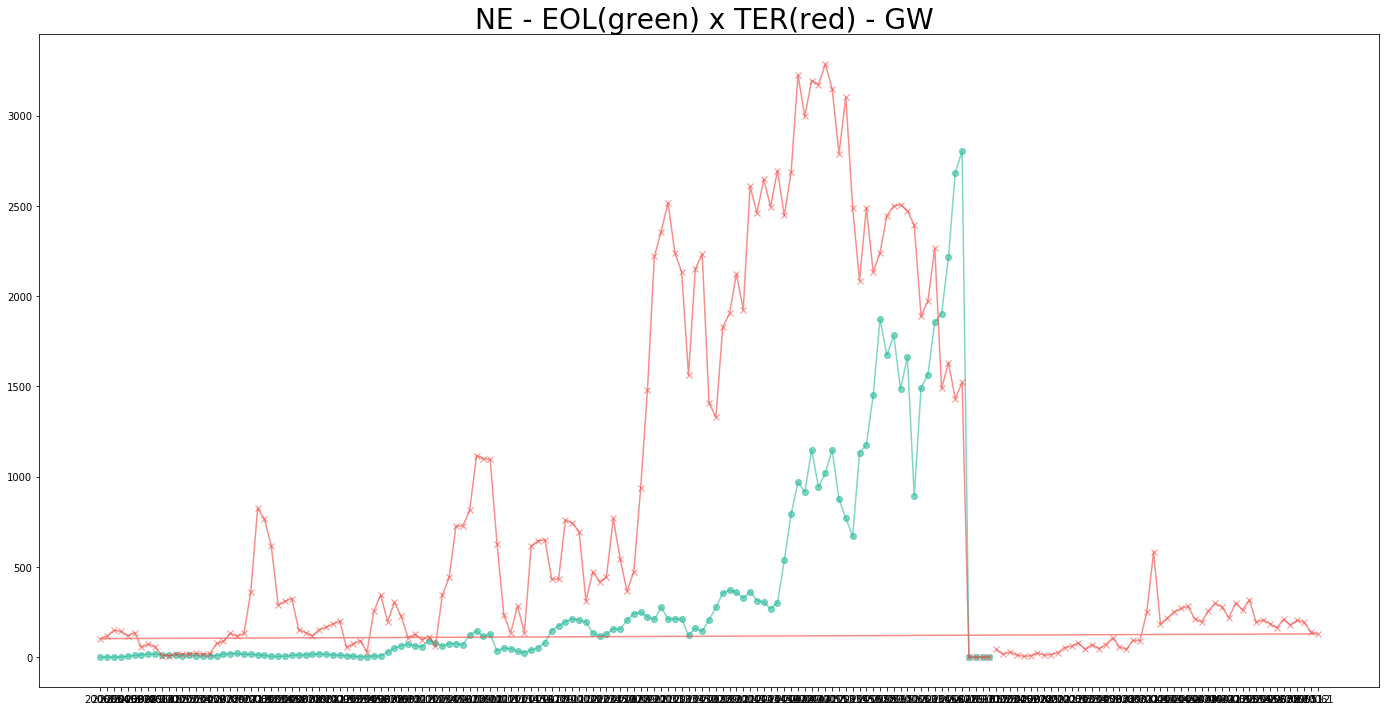

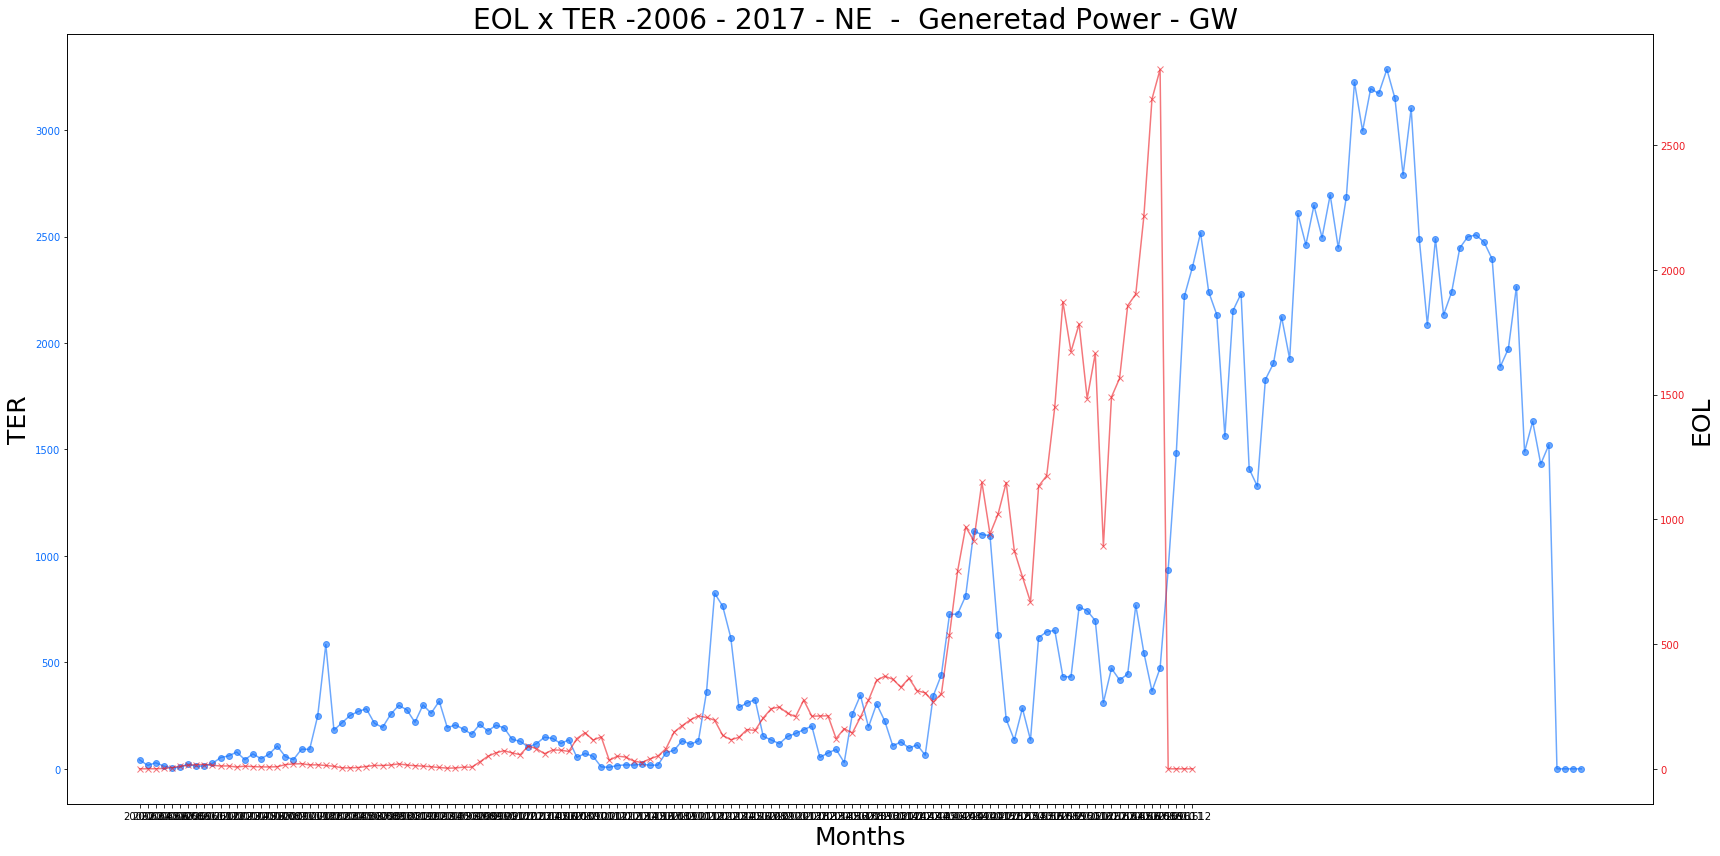

In [15]:
# plot charts
run_same_plot()
run_two_axes()

In [ ]:
plt.subplots(figsize=(24,12))

#plt.plot(df_EOL_GW.ano_mes, df_EOL_GW.geracao_de_energia)
#plt.plot(df_HID_GW.ano_mes, df_HID_GW.geracao_de_energia, color='#0b6efd' , marker="x",alpha=0.6, ls='')
plt.plot(df_HID_GW.ano_mes, df_HID_GW.geracao_de_energia, color='#0b6efd' , marker="x",alpha=0.6)


In [ ]:
fig, ax1 = plt.subplots(figsize=(24,12))

#plt.suptitle('Generetad Power - GW', fontsize=38)
plt.title('All Types Generetad Power - GW ', fontsize=28)

# plots
color = '#0b6efd'
ax1.set_xlabel('Months', fontsize=25)
ax1.set_ylabel('EOL', fontsize=25)
ax1.plot(df_HID_GW.ano_mes, df_HID_GW.geracao_de_energia, color=color, marker="o", alpha=0.6)

ax1.set_xlabel('Months', fontsize=25)
ax1.set_ylabel('TER', fontsize=25)
ax1.plot(df_EOL_GW.ano_mes, df_EOL_GW.geracao_de_energia, color=color, marker="x", alpha=0.6)




In [ ]:
2941+900


In [ ]:
# plot data
plot_sns_linecharts(df_EOL_GW,"EOL - GW - All Regions" )
plot_sns_linecharts(df_EME_GW,"EME - GW - All Regions" )

In [ ]:
# TODO EOL Last 5 Years

In [ ]:
print('total',len(last_EOL_5yrs))

last_EOL_5yrs = df_EOL_GW.iloc[599:,]
print('last 5yrs',len(last_EOL_5yrs))

last_EOL_10yrs = df_EOL_GW.iloc[539:,]
print('last 10yrs',len(last_EOL_10yrs))

last_EOL_15yrs = df_EOL_GW.iloc[479:,]
print('last 15yrs',len(last_EOL_15yrs))

#plots
plot_sns_linecharts(df_EOL_GW,"EOL  total - GW - All Regions" )
plot_sns_linecharts(last_EOL_15yrs,"last 15yrs - GW - All Regions" )
plot_sns_linecharts(last_EOL_10yrs,"last 10yrs - GW - All Regions" )
plot_sns_linecharts(last_EOL_5yrs,"last 5yrs - GW - All Regions" )




##### so first 5 years seems to be noise, and we have a hole or high sazonality

In [ ]:
def plot_sns_linecharts(df, title):
    plt.figure(figsize=(22,8)) # location matters, if inside loop will plot each one 
    plt.suptitle(title, fontsize=18)
#    plt.title("All Dataset", fontsize=10) 
    sns.lineplot(  
                 x= 'ano_mes',
                 y= 'geracao_de_energia',
                 data = df,
                 sort=True,
                 ci=None,
                 palette='twilight_r',
                 legend= 'full',
                )



In [ ]:
df_EOL_GW.describe()

In [ ]:
df_EOL_GW.head()


In [ ]:
df_EOL_GW.regiao.value_counts()


In [ ]:
df_EOL_GW.regiao.value_counts()

s = remove_first_15_years.loc[remove_first_15_years.regiao == 'S']
print('S', len(a))
a.tail(30)

ne = remove_first_15_years.loc[remove_first_15_years.regiao == 'NE']
print('NE', len(a))
a.tail(30)


se = remove_first_15_years.loc[remove_first_15_years.regiao == 'SE/CO']
print('SE/CO', len(a))
a.tail(30)

#plot_sns_linecharts(s, 'EOL - S - Generated Power GW')
#plot_sns_linecharts(ne, 'EOL - NE - Generated Power GW')
#plot_sns_linecharts(se, 'EOL - SE/CO- Generated Power GW')

#plt.style.use('classic')
plt.style.use('ggplot')

plt.figure(figsize=(22,8)) # location matters, if inside loop will plot each one 
plt.suptitle('Generetad Power - GW', fontsize=18)
plt.plot_date(ne.ano_mes, ne.geracao_de_energia, color='#44b4ba')
plt.plot_date(se.ano_mes, se.geracao_de_energia, c="blue")
plt.plot_date(s.ano_mes, s.geracao_de_energia, 'rd')

#legend((line1, line2, line3), ('label1', 'label2', 'label3'))

#pt.show()

In [ ]:
#scatter needs to be numeric
#ne.plot.scatter(    x='ano_mes', 
 #                   y='geracao_de_energia',
  #                  figsize=(13.5, 6),
   #                 c='Timestamp',
    #                colormap='magma',
     #               alpha=0.25,
      #          )
    

In [ ]:


plt.figure(figsize=(22,8)) # location matters, if inside loop will plot each one 
plt.suptitle("Only GW - All Regions", fontsize=18)#plt.ylabel("Mw")
#plt.xlabel("Months")

sns.lineplot(  
             x= 'ano_mes',
             y= 'geracao_de_energia',
             data = first_two_yrs,
             hue='regiao',
             sort=True,
             ci=None,
             palette='twilight_r',
             legend= 'full',
            )
first_two_yrs_mw = result_MW.iloc[:24,]


plt.figure(figsize=(22,8)) # location matters, if inside loop will plot each one 
plt.suptitle("Only MW - All Regions", fontsize=18)
#plt.ylabel("Mw")
#plt.xlabel("Months")

sns.lineplot(  
             x= 'ano_mes',
             y= 'geracao_de_energia',
             data = first_two_yrs_mw,
             hue='regiao',
             sort=True,
             ci=None,
             palette='twilight_r',
             legend= 'full',
            #style ='regiao',
            #markers='regiao',
            )

In [ ]:
def get_columns_values(column: str):
    print('------------------------------------')
    print('VALUES COUNT', column)
    print(df[column].value_counts())
    print('------------------------------------')

In [ ]:
columns_collection = ['tipo_de_geracao','regiao','unidade_de_medida','ano']
for _ in columns_collection:
    get_columns_values(_)

In [ ]:
def plot_sns_lines(data,color, title):
    plt.figure(figsize=(15,7.5)) # location matters, if inside loop will plot each one 
    
    for i in range(len(data)):
        sns.set_palette(color[i])
        sns.lineplot(  
                     x= range(len(data[i])),
                     y= 'geracao_de_energia',
                     data = data[i],
                     hue='regiao',
                    )
        plt.ylabel("Mw")
        plt.title(title) 
        plt.xlabel("Months")
    

In [ ]:
#print(df.columns)
#df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],
#type(df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],)
#plot_simple(df.loc[df['tipo_de_geracao'] == "EOL"])
collection_eol = [
                   df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "Sistemas") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "SE/CO") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "S") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "N") & (df['unidade_de_medida'] == "Mwmed")],
                 ]

collection_hydro = [
                   df.loc[(df['tipo_de_geracao'] == "HID") & (df['regiao'] == "Sistemas") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "HID") & (df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "HID") & (df['regiao'] == "SE/CO") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "HID") & (df['regiao'] == "S") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "HID") & (df['regiao'] == "N") & (df['unidade_de_medida'] == "Mwmed")],
                 ]

collection_thermo = [
                   df.loc[(df['tipo_de_geracao'] == "TER") & (df['regiao'] == "Sistemas") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "TER") & (df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "TER") & (df['regiao'] == "SE/CO") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "TER") & (df['regiao'] == "S") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "TER") & (df['regiao'] == "N") & (df['unidade_de_medida'] == "Mwmed")],
                 ]

collection_all_types = [
                   df.loc[(df['regiao'] == "Sistemas") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['regiao'] == "SE/CO") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['regiao'] == "S") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['regiao'] == "N") & (df['unidade_de_medida'] == "Mwmed")],
                 ]

#seaborn pallet = https://s3.amazonaws.com/codecademy-content/programs/dataviz-python/unit-5/seaborn-design-2/article2_image9.png
color_collection = ["Dark2",'BrBG','Set1','gist_earth','viridis']

#plot_sns_lines(collection_all_types, color_collection, "Generated Power -All types - All regions")

plot_sns_lines(collection_hydro, color_collection, "Generated Power - HID - All regions")
plot_sns_lines(collection_thermo, color_collection, "Generated Power - TER - All regions")
plot_sns_lines(collection_eol, color_collection, "Generated Power -EOL - All regions")


#plot_sns_lines(df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],)


In [ ]:
something = df.loc[df['tipo_de_geracao'] == "EOL"]
type(something)

In [ ]:
df_3= df.loc[(df['tipo_de_geracao'] == "EOL")  & (df['unidade_de_medida'] == "Mwmed")]
type(df_3)

In [ ]:
sns.lineplot(  
             x= range(len(df_3)),
             y= 'geracao_de_energia',
             data = df_3,
             hue='regiao',
            )